<a href="https://colab.research.google.com/github/TCU-DCDA/WRIT20833-2025/blob/main/notebooks/homework/WRIT20833_HW4-2_Topic_Modeling_Integration_F25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW4-2: Topic Modeling and Integration
**Due: October 17th**  
**Intro to Coding in the Humanities - Midterm Assignment Part 2**

**Student Name:** _Replace with your name_

**Upload:** `LASTNAME_HW4-2_F25.ipynb`

---

## Assignment Overview

You'll now use topic modeling to uncover hidden patterns in your dataset and reflect on your complete analytical journey. This assignment builds directly on your HW4-1 work.

**Remember**: The best insights come from being surprised by your data. If your topic modeling results differ from your predictions, that's a sign of genuine learning!

---

## Step 1: Reconnecting with Your Predictions
*Before You Begin*

### Review Your HW4-1 Work

Before running any new code, take time to review what you've already learned:

### 📝 Reflection: Your Predictions from HW4-1

**Your Topic Modeling Predictions from HW4-1 Step 5:**

*(Copy your topic modeling predictions from HW4-1. What specific topics did you predict would emerge?)*

1. Topic 1:

2. Topic 2:

3. Topic 3:

**Current State of Knowledge:**

*(After completing HW4-1's term frequency and sentiment analysis, how has your understanding evolved? What do you now think topic modeling might reveal?)*


---

## Step 2: Loading Your HW4-1 Data
*Picking Up Where You Left Off*

You'll continue working with the same dataset from HW4-1.

In [1]:
# STEP 1: Install Required Libraries
# Run this cell ONCE, then follow the instructions below

print("📦 Installing dependencies (this takes ~30 seconds)...")
print("=" * 60)

# Uninstall conflicting packages
!pip uninstall -y numpy pandas scipy

# Install compatible versions together
!pip install -q numpy==1.26.4 pandas==2.2.2 scipy==1.13.1

# Install gensim and nltk
!pip install -q gensim==4.3.3 nltk

print("\n" + "=" * 60)
print("✅ Installation complete!")
print("=" * 60)
print("\n🔄 🔄 🔄 STOP! MANDATORY NEXT STEP 🔄 🔄 🔄")
print("\nYou MUST restart the runtime before continuing:")
print("   1. Click 'Runtime' in the menu bar above")
print("   2. Select 'Restart runtime'")
print("   3. When prompted, click 'Yes' to confirm")
print("   4. Then run the NEXT cell to import libraries")
print("\n⚠️  Do NOT skip this step or you will get errors!")
print("=" * 60)

📦 Installing dependencies (this takes ~30 seconds)...
Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: pandas 2.2.2
Uninstalling pandas-2.2.2:
  Successfully uninstalled pandas-2.2.2
Found existing installation: scipy 1.16.3
Uninstalling scipy-1.16.3:
  Successfully uninstalled scipy-1.16.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 68.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 99.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 16.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.1 requires scipy>=1.14.0; python_vers

In [1]:
# STEP 2: Import Libraries
# Run this cell ONLY AFTER restarting runtime

print("📚 Importing libraries...")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from collections import Counter

import gensim
from gensim import corpora
from gensim.models import LdaModel
from nltk.stem import WordNetLemmatizer

import nltk
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)

print("=" * 60)
print("✅ All libraries loaded and ready!")
print("=" * 60)
print(f"NumPy version: {np.__version__}")
print(f"Gensim version: {gensim.__version__}")
print("\n🎉 You're ready to proceed with the assignment!")

📚 Importing libraries...
✅ All libraries loaded and ready!
NumPy version: 1.26.4
Gensim version: 4.3.3

🎉 You're ready to proceed with the assignment!


In [2]:
# Load your cleaned dataset from HW4-1
# If you're in Google Colab, upload your file first:
# from google.colab import files
# uploaded = files.upload()

# Load your HW4-1 cleaned data
df = pd.read_csv('/content/Fulghum_4-1_cleaned_project_dataCSV.csv')  # Replace with your HW4-1 cleaned CSV filename

print(f"✅ Dataset loaded successfully!")
print(f"Dataset contains {len(df)} items")
print(f"\nColumns available: {df.columns.tolist()}")

✅ Dataset loaded successfully!
Dataset contains 1424 items

Columns available: ['Rating out of 10', 'Review title', 'Review content', 'Date ', 'clean_text_sentiment', 'words', 'meaningful_words', 'sentiment_score']


In [3]:
# Verify your data is ready
print("📊 DATASET SUMMARY FROM HW4-1")
print("=" * 40)
print(f"Total entries: {len(df)}")
print(f"Average sentiment score: {df['sentiment_score'].mean():.3f}")
print(f"\nFirst few entries:")
df.head()

📊 DATASET SUMMARY FROM HW4-1
Total entries: 1424
Average sentiment score: 0.280

First few entries:


,Rating out of 10,Review title,Review content,Date,clean_text_sentiment,words,meaningful_words,sentiment_score
0,8.0,"Slightly updated, partial retelling of Stephen...","It's 1988, and a group of young teens in the t...",18-Dec-22,"It's 1988, and a group of young teens in the t...","['it', 's', '1988', 'and', 'a', 'group', 'of',...","['1988', 'group', 'young', 'teens', 'town', 'd...",0.8626
1,8.0,"A movie's movie - stunningly beautiful, mystic...",I absolutely loved the new 'IT' movie and didn...,19-Sep-17,I absolutely loved the new 'IT' movie and didn...,"['i', 'absolutely', 'loved', 'the', 'new', 'it...","['absolutely', 'loved', 'didn', 'expect', 'goo...",0.9942
2,6.0,Where was the tension?,NaN,7-Sep-17,NaN,[],[],0.0000
3,NaN,A relentlessly creepy and unsettling ride.,While it could have used more subtlety in the ...,16-Sep-17,While it could have used more subtlety in the ...,"['while', 'it', 'could', 'have', 'used', 'more...","['used', 'subtlety', 'scare', 'moments', 'deli...",0.5867
4,6.0,I prefer the original IT film to this remake,I love horror and I loved Stephen King's origi...,9-Mar-18,I love horror and I loved Stephen King's origi...,"['i', 'love', 'horror', 'and', 'i', 'loved', '...","['love', 'horror', 'loved', 'stephen', 'king',...",0.8257


---

## Step 3: Text Preprocessing for Topic Modeling
*Different from HW4-1 Preprocessing!*

Topic modeling requires more aggressive text cleaning than sentiment analysis:

In [6]:
# Enhanced stopwords list for topic modeling
stopwords = [
    # Basic English stopwords
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours",
    "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers",
    "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves",
    "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is",
    "are", "was", "were", "be", "been", "being", "have", "has", "had", "having",
    "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or",
    "because", "as", "until", "while", "of", "at", "by", "for", "with", "about",
    "against", "between", "into", "through", "during", "before", "after", "above",
    "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under",
    "again", "further", "then", "once", "here", "there", "when", "where", "why",
    "how", "all", "both", "each", "few", "more", "most", "other", "some", "such",
    "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very",
    "s", "t", "can", "will", "just", "don", "should", "now", "ve", "ll", "amp",
    "also", "would", "could", "get", "go", "one", "two", "see", "time", "way",
    "may", "said", "say", "new", "first", "last", "long", "little", "much",
    "well", "still", "even", "back", "good", "many", "make", "made", "us", "really"
]

# ADD YOUR OWN DOMAIN-SPECIFIC STOPWORDS HERE
# Examples: for restaurant reviews, add "restaurant", "food", "place"
#           for book reviews, add "book", "story", "read"
custom_stopwords = ["film", "movie"]  # Fill in words specific to your dataset

stopwords.extend(custom_stopwords)

print(f"✅ Stopwords list loaded: {len(stopwords)} words to filter out")
print(f"Custom stopwords added: {custom_stopwords}")

✅ Stopwords list loaded: 160 words to filter out
Custom stopwords added: ['film', 'movie']


In [7]:
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

def preprocess_for_topics(text):
    """
    Aggressive text preprocessing for topic modeling:
    - Lowercase
    - Remove punctuation
    - Remove stopwords
    - Lemmatize (reduce to base form)
    """
    if pd.isna(text):
        return []

    # Convert to lowercase
    text = str(text).lower()

    # Remove punctuation and split into words
    words = re.findall(r'\b[a-z]+\b', text)

    # Remove stopwords and short words (< 3 characters)
    words = [word for word in words if word not in stopwords and len(word) >= 3]

    # Lemmatize words (reduce to base form)
    words = [lemmatizer.lemmatize(word) for word in words]

    return words

print("✅ Preprocessing function ready")

✅ Preprocessing function ready


In [8]:
# Test preprocessing on one text
text_column = 'Review content'  # Fill in your text column name from HW4-1

sample_text = df[text_column].iloc[0]
processed = preprocess_for_topics(sample_text)

print("Text Preprocessing Test:")
print(f"Original: {sample_text[:150]}...")
print(f"\nProcessed words: {processed}")
print(f"\nNotice: lowercase, no punctuation, lemmatized, stopwords removed")

Text Preprocessing Test:
Original: It's 1988, and a group of young teens in the town of Derry, Maine are terrorized by an otherworldly clown named Pennywise (Bill Skarsgard), who can ma...

Processed words: ['group', 'young', 'teen', 'town', 'derry', 'maine', 'terrorized', 'otherworldly', 'clown', 'named', 'pennywise', 'bill', 'skarsgard', 'worst', 'fear', 'must', 'band', 'together', 'stop', 'fiend', 'kill', 'king', 'novel', 'succeeded', 'large', 'part', 'due', 'nostalgic', 'immersion', 'baby', 'boomer', 'cultural', 'touchstone', 'filmmaker', 'decision', 'update', 'setting', 'late', 'understandable', 'sense', 'follow', 'featuring', 'adult', 'version', 'character', 'chronologically', 'fit', 'modern', 'time', 'filmmaker', 'decide', 'forgo', 'any', 'excessive', 'wallowing', 'pop', 'iconography', 'poster', 'song', 'reference', 'boil', 'story', 'horror', 'essential', 'nothing', 'original', 'mix', 'presented', 'feature', 'handful', 'memorable', 'scare', 'moment', 'special', 'effect', 'largel

In [9]:
# Apply preprocessing to entire dataset
df['processed_for_topics'] = df[text_column].apply(preprocess_for_topics)

print("✅ Preprocessing complete!")
print(f"\nProcessed {len(df)} documents")
print(f"\nExample processed documents:")
for i in range(3):
    print(f"{i+1}. {df['processed_for_topics'].iloc[i][:10]}...")

✅ Preprocessing complete!

Processed 1424 documents

Example processed documents:
1. ['group', 'young', 'teen', 'town', 'derry', 'maine', 'terrorized', 'otherworldly', 'clown', 'named']...
2. ['absolutely', 'loved', 'didn', 'expect', 'perfectly', 'paced', 'beautifully', 'shot', 'capture', 'love']...
3. []...


### Technical Checkpoint 1: Data Preparation

Before topic modeling, verify your data is ready:

In [10]:
# Checkpoint: Verify data is ready for topic modeling
doc_lengths = [len(doc) for doc in df['processed_for_topics']]
avg_length = np.mean(doc_lengths)
all_words = [word for doc in df['processed_for_topics'] for word in doc]
vocab_size = len(set(all_words))

print("📊 DATA PREPARATION CHECK")
print("=" * 40)
print(f"Number of documents: {len(df)}")
print(f"Vocabulary size: {vocab_size}")
print(f"Average document length: {avg_length:.1f} words")
print(f"Shortest document: {min(doc_lengths)} words")
print(f"Longest document: {max(doc_lengths)} words")

if avg_length < 10:
    print("\n⚠️ WARNING: Average document length is very short. Topic modeling may struggle.")
if vocab_size < 100:
    print("\n⚠️ WARNING: Vocabulary size is small. Consider reducing custom stopwords.")

📊 DATA PREPARATION CHECK
Number of documents: 1424
Vocabulary size: 8652
Average document length: 64.3 words
Shortest document: 0 words
Longest document: 666 words


---

## Step 4: Building Your Topic Model
*Discovering Hidden Themes*

Now we'll use Gensim LDA to discover topics in your data.

In [11]:
# Create Gensim dictionary and corpus
dictionary = corpora.Dictionary(df['processed_for_topics'])
corpus = [dictionary.doc2bow(doc) for doc in df['processed_for_topics']]

print("📖 Dictionary and corpus created!")
print(f"Total unique words in dictionary: {len(dictionary)}")
print(f"Total documents in corpus: {len(corpus)}")
print(f"\nExample word-to-ID mappings:")
for i, (word_id, word) in enumerate(list(dictionary.items())[:10]):
    print(f"  ID {word_id}: {word}")

📖 Dictionary and corpus created!
Total unique words in dictionary: 8652
Total documents in corpus: 1424

Example word-to-ID mappings:
  ID 0: adult
  ID 1: aforementioned
  ID 2: almost
  ID 3: any
  ID 4: baby
  ID 5: band
  ID 6: bill
  ID 7: boil
  ID 8: boomer
  ID 9: cast


### Experimenting with Number of Topics

Start by trying different numbers of topics to find the most interpretable results:

In [12]:
# Experiment: Try different numbers of topics
def train_and_display_topics(corpus, dictionary, num_topics):
    """
    Train an LDA model and display discovered topics
    """
    print(f"\n{'='*60}")
    print(f"MODEL WITH {num_topics} TOPICS")
    print(f"{'='*60}")

    model = LdaModel(
        corpus=corpus,
        id2word=dictionary,
        num_topics=num_topics,
        random_state=42,
        passes=15,
        alpha='auto',
        eta='auto'
    )

    for idx in range(num_topics):
        words = model.show_topic(idx, 10)
        word_list = [word for word, prob in words]
        print(f"Topic {idx}: {', '.join(word_list)}")

    return model

# Try 3, 5, and 7 topics
print("🧪 EXPERIMENTING WITH DIFFERENT NUMBERS OF TOPICS")
print("Watch how topics change as we increase the number...\n")

model_3 = train_and_display_topics(corpus, dictionary, 3)
model_5 = train_and_display_topics(corpus, dictionary, 5)
model_7 = train_and_display_topics(corpus, dictionary, 7)

🧪 EXPERIMENTING WITH DIFFERENT NUMBERS OF TOPICS
Watch how topics change as we increase the number...


MODEL WITH 3 TOPICS
Topic 0: horror, like, kid, scary, character, pennywise, great, story, book, scene
Topic 1: pennywise, horror, kid, bill, clown, child, character, king, fear, story
Topic 2: horror, king, thing, like, book, story, pennywise, great, child, clown

MODEL WITH 5 TOPICS
Topic 0: horror, king, story, character, pennywise, like, kid, clown, stephen, scare
Topic 1: pennywise, kid, bill, clown, horror, child, character, loser, fear, king
Topic 2: king, horror, stephen, clown, pennywise, novel, scene, muschietti, cast, thing
Topic 3: kid, horror, king, fear, scare, like, clown, adaptation, scary, year
Topic 4: horror, like, scary, kid, great, pennywise, scene, book, character, story

MODEL WITH 7 TOPICS
Topic 0: horror, story, character, pennywise, king, kid, like, clown, book, scare
Topic 1: pennywise, kid, bill, clown, horror, child, character, fear, king, loser
Topic 2: 

### 📝 Choose Your Best Model

**Based on the experiments above, which number of topics gives the most interpretable results?**

*(Consider: Are the topics distinct? Do they make sense? Are there too few (too broad) or too many (too fragmented)?)*

**My choice:** I will use _____ topics because:


In [13]:
# Train your final model with your chosen number of topics
num_topics = 5  # Fill in your chosen number (3, 5, or 7)

print(f"🤖 Training final LDA model with {num_topics} topics...\n")

lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=num_topics,
    random_state=42,
    passes=20,  # More passes for better final model
    alpha='auto',
    eta='auto'
)

print("✅ Final model training complete!\n")
print("🎯 YOUR DISCOVERED TOPICS")
print("=" * 70)

for idx in range(num_topics):
    words = lda_model.show_topic(idx, 10)
    word_list = [word for word, prob in words]
    print(f"\nTopic {idx}: {', '.join(word_list)}")
    print(f"Your interpretation/label: _____________________")

🤖 Training final LDA model with 5 topics...

✅ Final model training complete!

🎯 YOUR DISCOVERED TOPICS

Topic 0: horror, king, story, character, pennywise, like, kid, clown, stephen, scare
Your interpretation/label: _____________________

Topic 1: pennywise, kid, bill, clown, horror, child, character, fear, loser, king
Your interpretation/label: _____________________

Topic 2: king, horror, stephen, clown, pennywise, novel, muschietti, stand, cast, scene
Your interpretation/label: _____________________

Topic 3: kid, fear, horror, scare, king, boy, clown, like, adaptation, scary
Your interpretation/label: _____________________

Topic 4: horror, like, kid, scary, great, pennywise, scene, book, character, story
Your interpretation/label: _____________________


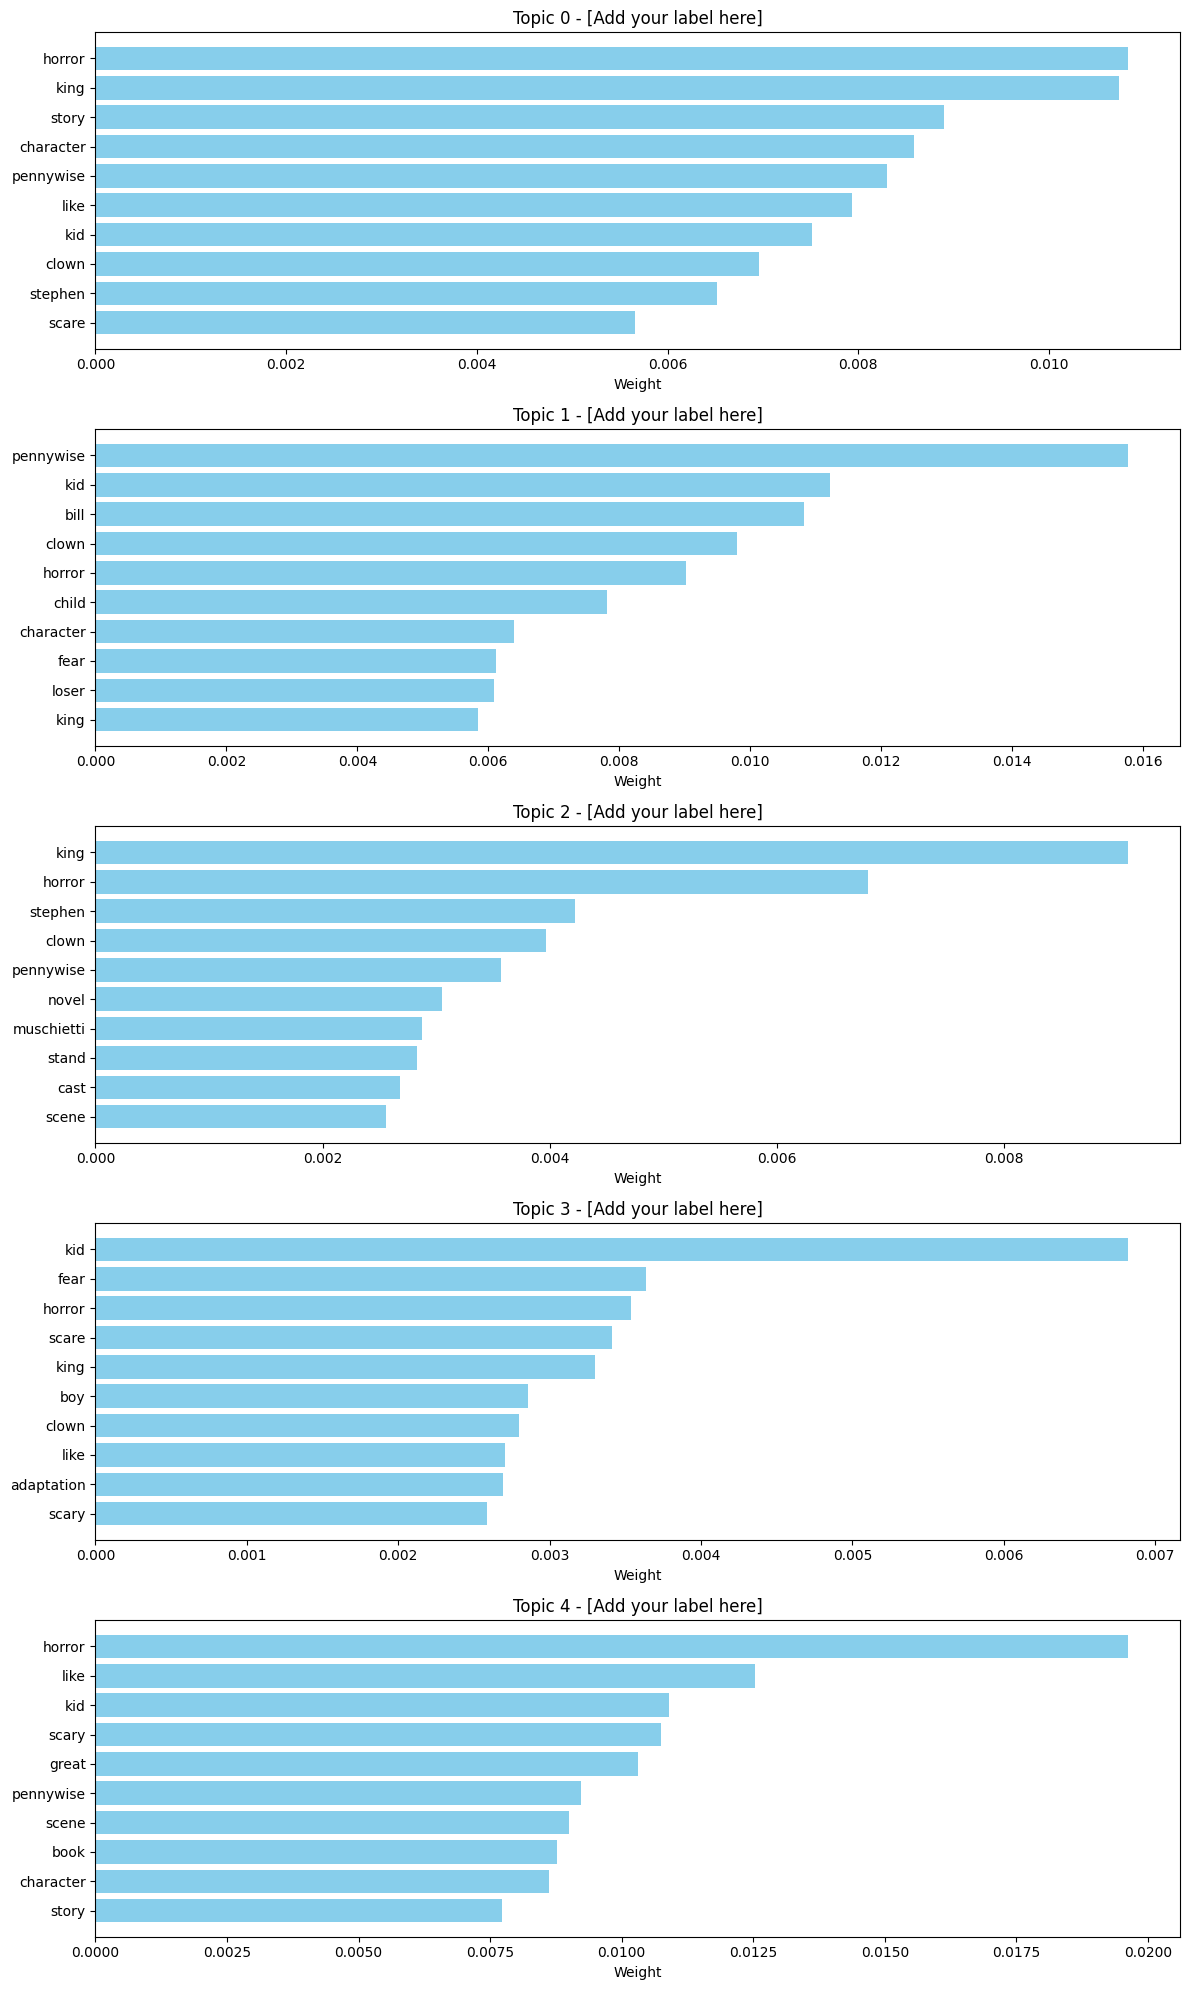

📊 Topic visualizations complete!


In [14]:
# Visualize your topics
import matplotlib.pyplot as plt

fig, axes = plt.subplots(num_topics, 1, figsize=(12, 4*num_topics))

if num_topics == 1:
    axes = [axes]

for idx in range(num_topics):
    words_weights = lda_model.show_topic(idx, 10)
    words = [word for word, weight in words_weights]
    weights = [weight for word, weight in words_weights]

    axes[idx].barh(range(len(words)), weights, color='skyblue')
    axes[idx].set_yticks(range(len(words)))
    axes[idx].set_yticklabels(words)
    axes[idx].set_xlabel('Weight')
    axes[idx].set_title(f'Topic {idx} - [Add your label here]')
    axes[idx].invert_yaxis()

plt.tight_layout()
plt.show()

print("📊 Topic visualizations complete!")

---

## Step 5: Validating Topic Assignments
*Human vs. Algorithm*

Let's see which topics the model assigns to documents and check if they make sense:

In [15]:
# Get dominant topic for each document
def get_document_topics(lda_model, corpus):
    """
    Get dominant topic assignment for each document
    """
    topic_assignments = []

    for doc in corpus:
        topic_dist = lda_model.get_document_topics(doc)
        if topic_dist:  # Check if not empty
            dominant_topic = max(topic_dist, key=lambda x: x[1])
            topic_assignments.append({
                'topic_num': dominant_topic[0],
                'topic_prob': round(dominant_topic[1], 3)
            })
        else:
            topic_assignments.append({
                'topic_num': -1,
                'topic_prob': 0.0
            })

    return topic_assignments

# Get topic assignments
topic_info = get_document_topics(lda_model, corpus)
df['dominant_topic'] = [t['topic_num'] for t in topic_info]
df['topic_probability'] = [t['topic_prob'] for t in topic_info]

print("✅ Topic assignments complete!")
print(f"\nTopic distribution across documents:")
print(df['dominant_topic'].value_counts().sort_index())

✅ Topic assignments complete!

Topic distribution across documents:
dominant_topic
0     124
1     134
2      22
3      19
4    1125
Name: count, dtype: int64


In [16]:
# Sample documents from each topic for validation
print("🔍 DOCUMENT-TOPIC VALIDATION CHECK")
print("=" * 70)
print("For each topic, read sample documents and assess if the assignment makes sense:\n")

for topic_num in range(num_topics):
    print(f"\n📌 TOPIC {topic_num}")
    print("=" * 50)

    # Get top words for this topic
    topic_words = lda_model.show_topic(topic_num, 8)
    word_list = [word for word, prob in topic_words]
    print(f"Keywords: {', '.join(word_list)}")

    # Get sample documents from this topic
    topic_docs = df[df['dominant_topic'] == topic_num]

    if len(topic_docs) == 0:
        print("No documents assigned to this topic.")
        continue

    print(f"\nDocuments in this topic: {len(topic_docs)}")
    print(f"\nSample documents (read and assess if topic assignment makes sense):\n")

    for i, (idx, row) in enumerate(topic_docs.head(3).iterrows(), 1):
        print(f"  {i}. {row[text_column][:150]}...")
        print(f"     Probability: {row['topic_probability']:.3f}")
        print()

🔍 DOCUMENT-TOPIC VALIDATION CHECK
For each topic, read sample documents and assess if the assignment makes sense:


📌 TOPIC 0
Keywords: horror, king, story, character, pennywise, like, kid, clown

Documents in this topic: 124

Sample documents (read and assess if topic assignment makes sense):

  1. For a younger audience, unjaded by so many horror and suspense flicks, this movie will probably be creepier. This version of the story is somewhat a v...
     Probability: 0.990

  2. What persuaded me to watch this movie was the blessing bestowed upon it by the stories original creator, Stephen King, who claimed: "I wasn't prepared...
     Probability: 0.610

  3. So I went and saw IT, and came back unimpressed. I mean it was a good movie, no doubt about that. A bunch of kids, outcasts in their own right, being ...
     Probability: 0.509


📌 TOPIC 1
Keywords: pennywise, kid, bill, clown, horror, child, character, fear

Documents in this topic: 134

Sample documents (read and assess if top

TypeError: 'float' object is not subscriptable

### 📝 Model Assessment (2 paragraphs)

**Paragraph 1 - Prediction vs. Reality:**

*(How did your topic modeling results compare to your specific predictions from HW4-1 Step 5? What topics emerged that you hadn't expected? Were you surprised by what the algorithm found?)*


**Paragraph 2 - Model Validation:**

*(Look at the sample documents above for each topic. Do the assigned topics make sense when you read the full text? Where would you disagree with the model? What does this tell you about the algorithm's interpretation vs. human understanding?)*


---

## Step 6: Integration Across All Three Methods
*Connecting Term Frequency, Sentiment, and Topics*

Now let's explore how all three analytical methods work together:

In [17]:
# Analyze sentiment patterns within each topic
print("📊 SENTIMENT BY TOPIC ANALYSIS")
print("=" * 50)

for topic_num in range(num_topics):
    topic_docs = df[df['dominant_topic'] == topic_num]

    if len(topic_docs) == 0:
        continue

    avg_sentiment = topic_docs['sentiment_score'].mean()

    # Get topic keywords
    topic_words = lda_model.show_topic(topic_num, 5)
    word_list = [word for word, prob in topic_words]

    print(f"\nTopic {topic_num}: {', '.join(word_list)}")
    print(f"  Documents: {len(topic_docs)}")
    print(f"  Average sentiment: {avg_sentiment:.3f}")
    print(f"  Sentiment range: {topic_docs['sentiment_score'].min():.3f} to {topic_docs['sentiment_score'].max():.3f}")

📊 SENTIMENT BY TOPIC ANALYSIS

Topic 0: horror, king, story, character, pennywise
  Documents: 124
  Average sentiment: 0.245
  Sentiment range: -0.996 to 0.998

Topic 1: pennywise, kid, bill, clown, horror
  Documents: 134
  Average sentiment: 0.300
  Sentiment range: -0.998 to 1.000

Topic 2: king, horror, stephen, clown, pennywise
  Documents: 22
  Average sentiment: -0.014
  Sentiment range: -0.996 to 0.991

Topic 3: kid, fear, horror, scare, king
  Documents: 19
  Average sentiment: -0.127
  Sentiment range: -0.993 to 0.993

Topic 4: horror, like, kid, scary, great
  Documents: 1125
  Average sentiment: 0.295
  Sentiment range: -0.998 to 1.000


/tmp/ipython-input-2770127664.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(topic_sentiment_data, labels=[f'Topic {i}' for i in range(num_topics)])


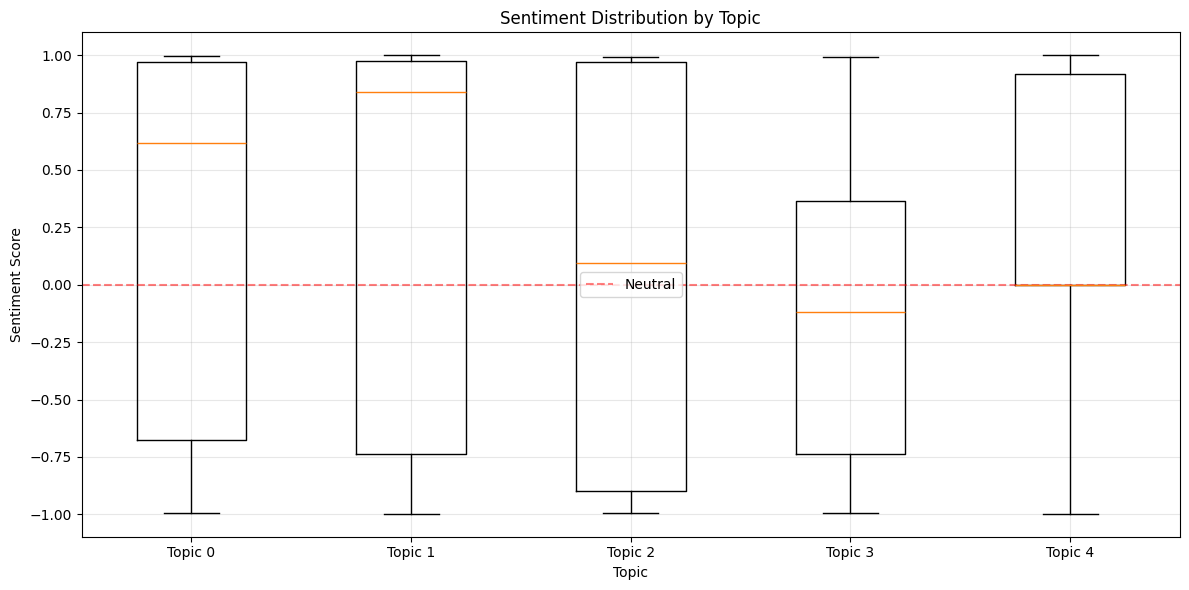

📊 Sentiment by topic visualization complete!


In [18]:
# Visualize sentiment distribution by topic
fig, ax = plt.subplots(figsize=(12, 6))

# Create box plot of sentiment scores by topic
topic_sentiment_data = [df[df['dominant_topic'] == i]['sentiment_score'].values
                        for i in range(num_topics)]

ax.boxplot(topic_sentiment_data, labels=[f'Topic {i}' for i in range(num_topics)])
ax.set_xlabel('Topic')
ax.set_ylabel('Sentiment Score')
ax.set_title('Sentiment Distribution by Topic')
ax.axhline(y=0, color='r', linestyle='--', alpha=0.5, label='Neutral')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 Sentiment by topic visualization complete!")

In [19]:
# Create comprehensive summary
print("📋 COMPLETE ANALYTICAL SUMMARY")
print("=" * 60)
print(f"\nDataset: {len(df)} documents")
print(f"\n1️⃣ TERM FREQUENCY (from HW4-1):")
print(f"   Vocabulary size: {len(dictionary)} unique words")
print(f"   [Your top words from HW4-1]")

print(f"\n2️⃣ SENTIMENT ANALYSIS (from HW4-1):")
print(f"   Average sentiment: {df['sentiment_score'].mean():.3f}")
print(f"   Positive: {len(df[df['sentiment_score'] > 0.1])} ({len(df[df['sentiment_score'] > 0.1])/len(df)*100:.1f}%)")
print(f"   Neutral: {len(df[(df['sentiment_score'] >= -0.1) & (df['sentiment_score'] <= 0.1)])} ({len(df[(df['sentiment_score'] >= -0.1) & (df['sentiment_score'] <= 0.1)])/len(df)*100:.1f}%)")
print(f"   Negative: {len(df[df['sentiment_score'] < -0.1])} ({len(df[df['sentiment_score'] < -0.1])/len(df)*100:.1f}%)")

print(f"\n3️⃣ TOPIC MODELING (HW4-2):")
print(f"   Number of topics: {num_topics}")
for topic_num in range(num_topics):
    topic_docs = df[df['dominant_topic'] == topic_num]
    if len(topic_docs) > 0:
        topic_words = lda_model.show_topic(topic_num, 3)
        word_list = [word for word, prob in topic_words]
        print(f"   Topic {topic_num} ({len(topic_docs)} docs, avg sentiment {topic_docs['sentiment_score'].mean():.2f}): {', '.join(word_list)}")

📋 COMPLETE ANALYTICAL SUMMARY

Dataset: 1424 documents

1️⃣ TERM FREQUENCY (from HW4-1):
   Vocabulary size: 8652 unique words
   [Your top words from HW4-1]

2️⃣ SENTIMENT ANALYSIS (from HW4-1):
   Average sentiment: 0.280
   Positive: 730 (51.3%)
   Neutral: 398 (27.9%)
   Negative: 296 (20.8%)

3️⃣ TOPIC MODELING (HW4-2):
   Number of topics: 5
   Topic 0 (124 docs, avg sentiment 0.24): horror, king, story
   Topic 1 (134 docs, avg sentiment 0.30): pennywise, kid, bill
   Topic 2 (22 docs, avg sentiment -0.01): king, horror, stephen
   Topic 3 (19 docs, avg sentiment -0.13): kid, fear, horror
   Topic 4 (1125 docs, avg sentiment 0.29): horror, like, kid


---

## Step 7: Final Reflection and Integration
*From Assumptions to Data-Driven Insights*

This is the heart of the assignment. Reflect deeply on your complete analytical journey.

### 📝 Part A: Method and Tool Assessment (2 paragraphs)

**Paragraph 1 - Evolution of Understanding:**

*(How did your understanding change from your initial predictions through term frequency, sentiment analysis, and topic modeling? Where were you most wrong, and what did those surprises teach you? What questions emerged that you hadn't anticipated?)*


**Paragraph 2 - Analytical Methods:**

*(Which analytical method (term frequency, sentiment analysis, or topic modeling) was most revealing for your dataset? What did you learn about what these tools can and cannot tell you? How do they complement each other?)*


### 📝 Part B: Humanities Perspective (1-2 paragraphs)

**Computational vs. Traditional Analysis:**

*(How does this data-driven approach compare to how you might traditionally analyze texts in humanities courses? Consider how this process helps you avoid the trap of cherry-picking evidence to support predetermined conclusions. What are the advantages and limitations of automated analysis? What role does human interpretation still play?)*


### 📝 Part C: Personal Learning (1 paragraph)

**Your Analytical Growth:**

*(What did this complete process (HW4-1 + HW4-2) teach you about forming and testing hypotheses? How has your relationship to evidence and conclusions evolved? What will you take from this experience into future research or analysis?)*


---

## Step 8: Save Your Work and Prepare Deliverables

In [ ]:
# Save your final integrated dataset
output_filename = 'LASTNAME_HW4-2_integrated_data.csv'  # Replace LASTNAME
df.to_csv(output_filename, index=False)

print(f"✅ Integrated dataset saved as: {output_filename}")
print(f"\nFinal dataset summary:")
print(f"- Total entries: {len(df)}")
print(f"- Columns: {df.columns.tolist()}")
print(f"- Number of topics: {num_topics}")
print(f"- Average sentiment: {df['sentiment_score'].mean():.3f}")

### 📋 Submission Checklist

Before submitting, make sure you have:

- [ ] **Reviewed your HW4-1 predictions** and copied them to Step 1
- [ ] **Added custom domain-specific stopwords** appropriate for your dataset
- [ ] **Experimented with different numbers of topics** and chose the most interpretable
- [ ] **Labeled each discovered topic** with meaningful names
- [ ] **Validated topic assignments** by reading sample documents
- [ ] **Completed all reflection paragraphs** with thoughtful, specific responses
- [ ] **Integrated findings** across term frequency, sentiment, and topic modeling
- [ ] **Named your files correctly**: `LASTNAME_HW4-2_F25.ipynb`

### 📤 What to Submit:

Submit to your **Pre-Project Practice Files** dropbox:
1. **Jupyter Notebook** (`LASTNAME_HW4-2_F25.ipynb`) with all code and markdown responses
2. **Any new visualization PNG files** (if not embedded in notebook)

**Due Date**: October 13th

---

## Grading Philosophy

This assignment prioritizes **earned insight over clean code**. You'll be evaluated on:

- **Depth of reflection** and willingness to be surprised by your data
- **Evolution of thinking** from initial predictions through final analysis
- **Critical assessment** of both your results and your analytical tools
- **Integration** of technical analysis with humanistic interpretation

Technical execution matters, but **intellectual growth and genuine insight are the primary goals**. The best submissions will show students whose understanding deepened and changed through engagement with their data.

**Remember**: Being "wrong" in your predictions is not failure—it's evidence of genuine learning. The goal is not to confirm what you already thought, but to discover what the data reveals.

---

## Congratulations! 🎉

You've completed a comprehensive text analysis journey, moving from raw data through term frequency, sentiment analysis, and topic modeling to earned insights. This is the kind of data-driven analytical thinking that defines digital humanities research.

The skills you've practiced—forming hypotheses, testing them systematically, being surprised by results, and integrating multiple analytical methods—will serve you well in any future research or analysis work.